# Collect Data


In [286]:
import numpy as np
import pandas as pd
import re

In [287]:

df.head()#df = pd.read_csv('/content/drive/Shareddrives/real/Big Data/data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

# for jupyter 
# df = pd.read_csv('data/big-data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

df = pd.read_csv('data/CSV/vn_news_223_tdlfr.csv')
df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [288]:
# clean domain names, since there are things like http://zing.news.vn/ and zing.news.vn which are the same thing
for i in range(len(df['domain'])):
  df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

In [289]:
# check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


# Visualization

In [290]:
#!pip install plotly
#!pip install cufflinks

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt
# run this again if iplot doesn't display
# plotly packages
import plotly
#import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

Tổng số lượng nhãn: 223 

label
0    123
1    100
dtype: int64 



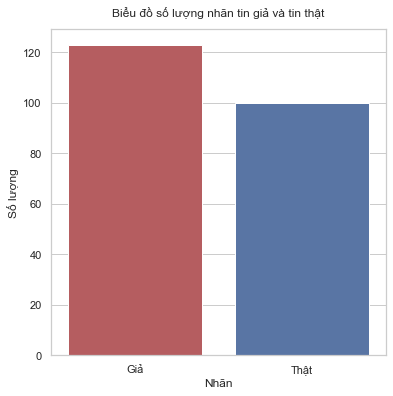

In [292]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=['Giả', 'Thật'], y=label_count, palette=['r', 'b'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Tổng số lượng nhãn:', len(df['label']), '\n')
print(label_count, '\n')

Tổng số lượng các tên miền: 29 

domain
vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                7
thoibao.today               6
tuoitre.vn                  5
tintucqpvn.net              5
thanhnien.vn                5
kinhdoanh.vnexpress.net     3
phapluat.news               3
doisong.vnexpress.net       2
thegioitre.vn               2
giadinhtiepthi.com          2
giaitri.vnexpress.net       2
ipick.vn                    2
thoibao.de                  2
vietgiaitri.com             1
baonuocmy.com               1
binhluan.biz                1
sorry.vn                    1
suckhoe.vnexpress.net       1
dulich.vnexpress.net        1
sohoa.vnexpress.net         1
baoangiang.com.vn           1
laodong.vn                  1
haiduong.tintuc.vn          1
gioitreviet.net             1
autoxe.net                  1
dtype: int64 



"domain_count.iplot(\n    kind='barh',\n    xTitle='Số từ',\n    yTitle='Số tin tức',\n    linecolor='black',\n    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',\n    color='red')"

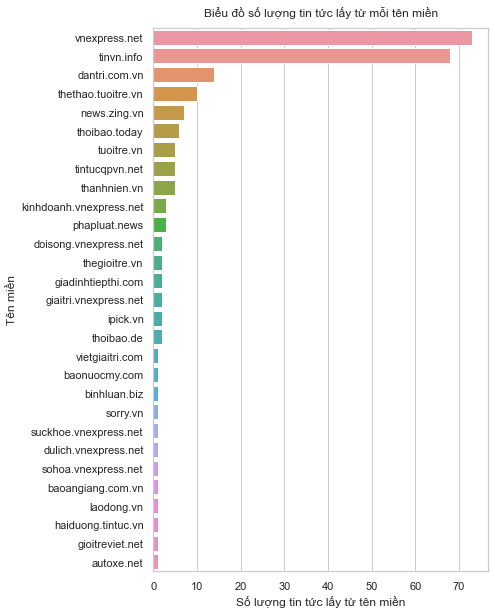

In [293]:
# Count of each domain names
domain_count = df.value_counts('domain')

plt.figure(figsize=(6, 10))
sns.barplot(x=domain_count, y=domain_count.index)
plt.xlabel('Số lượng tin tức lấy từ tên miền')
plt.ylabel('Tên miền')
plt.title('Biểu đồ số lượng tin tức lấy từ mỗi tên miền', y=1.01) # y = space from graph

print('Tổng số lượng các tên miền:', len(set(df['domain'])), '\n')
print(domain_count, '\n')

'''domain_count.iplot(
    kind='barh',
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',
    color='red')'''

In [ ]:
'''df['len_text'].iplot(
    kind='hist',
    bins=50,
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng từ trong một tin tức',
    )'''

In [316]:
# add length of each text to dataframe
len_text = [len(t.split()) for t in df['text']]
df['len_text'] = len_text

Text(0.5, 1.0, 'Biểu đồ số lượng từ trong tin thật và giả')

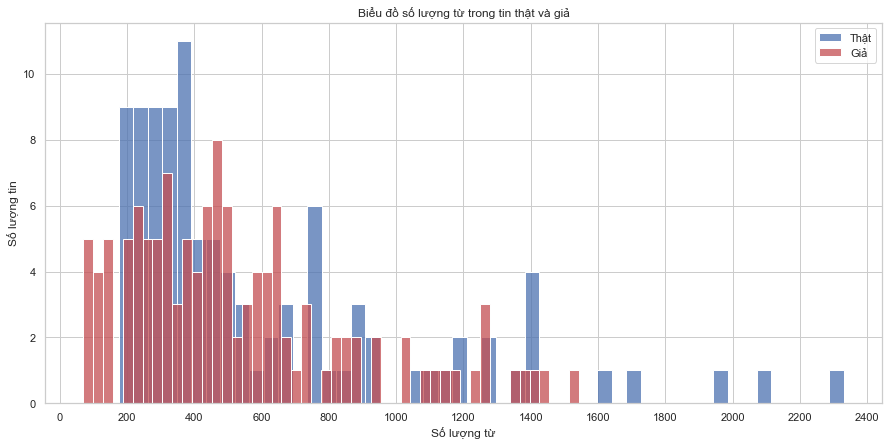

In [338]:
# for graphing
len_true = [t for t in df[df['label'] == 1]['len_text']]
len_fake = [t for t in df[df['label'] == 0]['len_text']]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true, bins=50, color='b')
sns.histplot(data=len_fake, bins=50, color='r')
plt.xticks(ticks=range(0, 2500, 200))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ trong tin thật và giả')

# Tokenize and clean

In [15]:
# idea: top các bài báo có số lượng từ nhiều nhất thuộc về các domain nào
# word cloud

In [19]:
from underthesea import word_tokenize
import itertools

In [18]:
# tokenize with word segment and clean punctuation
def tokenize(sent):
  return re.findall(r'[_\w]+', word_tokenize(sent, format='text'))

In [266]:
# remove stopwords in news text
def clean_stopwords(sent_list):
  ''' sent_list: already tokenized sentence in list format
  '''
  clean_sent = []
  for word in sent_list:
    if word not in stopwords:
      clean_sent.append(word)
  return clean_sent

In [282]:
clean_news = [clean_stopwords(tokenize(n)) for n in df['text']]
df['len_text_clean'] = [len(n) for n in clean_news]

Text(0.5, 1.0, 'Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

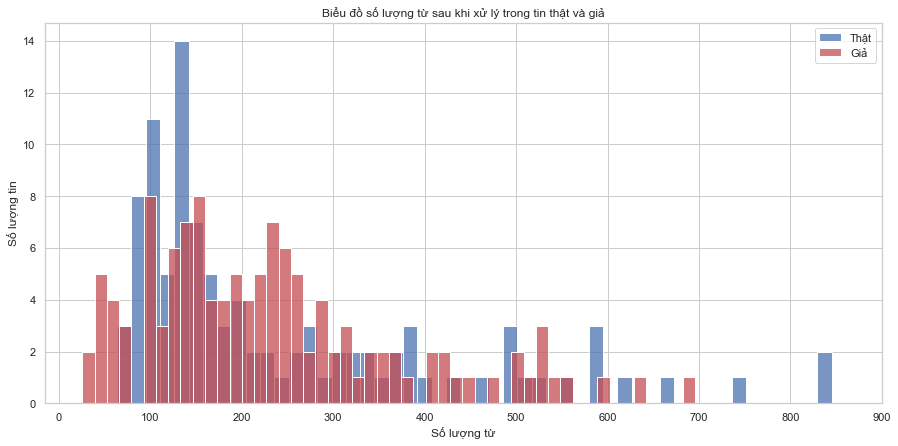

In [339]:
# for graphing
len_true = [t for t in df[df['label'] == 1]['len_text_clean']]
len_fake = [t for t in df[df['label'] == 0]['len_text_clean']]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true, bins=50, color='b')
sns.histplot(data=len_fake, bins=50, color='r')
plt.xticks(ticks=range(0, 1000, 100))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

In [341]:
# tokenize and seperate true and fake news data
true_news = [tokenize(n) for n in df[df['label'] == 1]['text']]
fake_news = [tokenize(n) for n in df[df['label'] == 0]['text']]

In [260]:
# get stopwords list
f = open('data/vietnamese-stopwords-dash.txt', 'r')
stopwords = f.read().split('\n')

In [263]:
print(stopwords[:50])

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán']


Word Cloud

In [262]:
from wordcloud import WordCloud, ImageColorGenerator

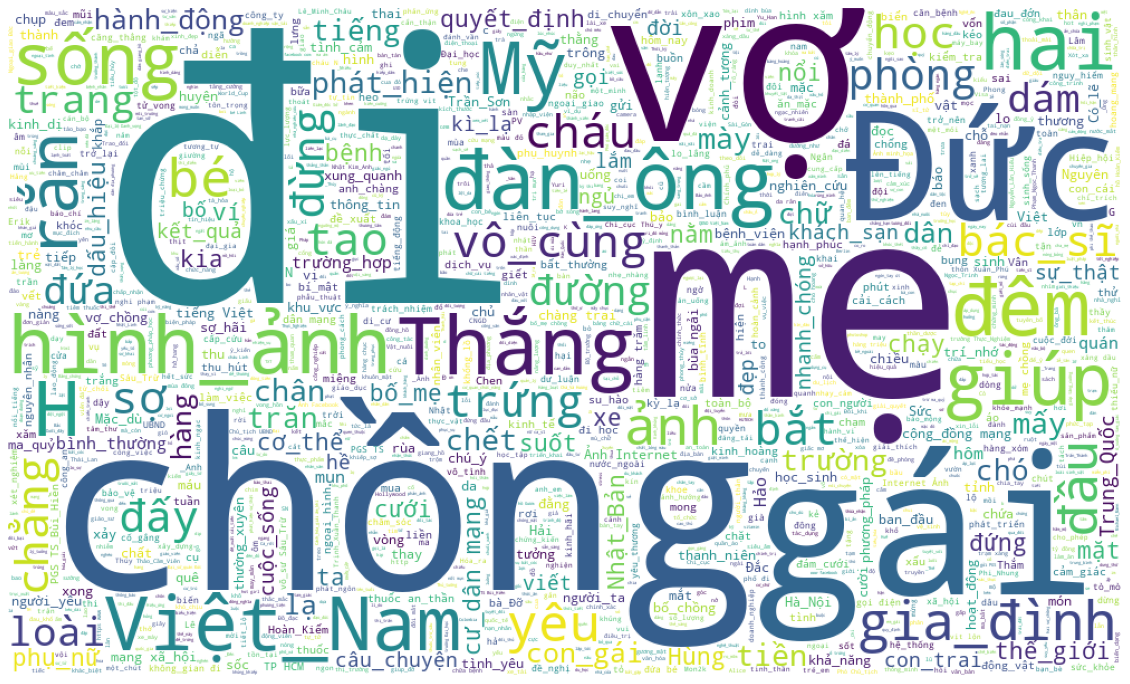

In [264]:
# True news
true_news_flatten = list(itertools.chain(*true_news))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='white', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(true_news_flatten))
plt.axis("off")
plt.imshow(wc)

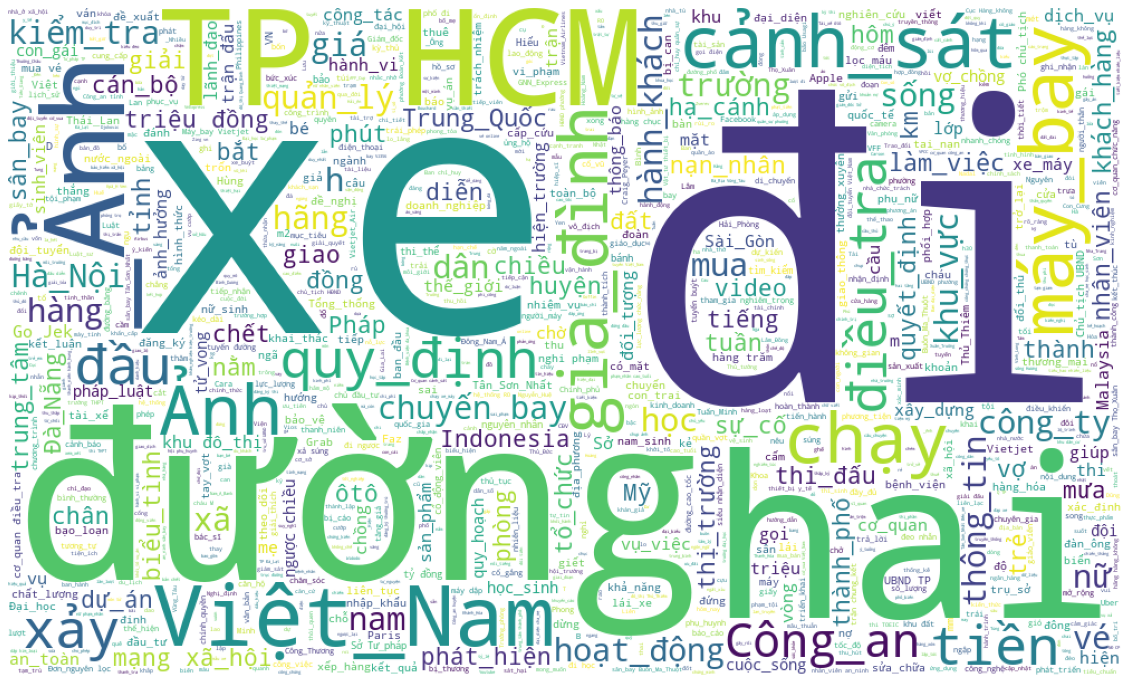

In [199]:
# Fake news
fake_news_flatten = list(itertools.chain(*fake_news))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='white', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(fake_news_flatten))
plt.axis("off")
plt.imshow(wc)

# Pre-processing

In [ ]:
'''
1. clean domain names (done)
2. classify domain names to categorical type? labelencoder or sth else
3. xử lý text
    check missing or too trash (done)
    clean, filer (regex) on some part if needed (done)
    tokenize(done), word segment(done), remove stopwords?(done), remove numerical tokens?, group same tokens? -> check again if too short text data remains-> remove from data?
    word embedding: tfidf?, word2vec...?
'''

In [342]:
clean_news

[['Thủ_tướng',
  'Abe',
  'cúi',
  'đầu',
  'xin_lỗi',
  'hành_động',
  'phi',
  'thể_thao',
  'tuyển',
  'Nhật',
  'Theo',
  'Sankei_Sports',
  'Thủ_tướng',
  'Nhật_Bản_Shinzo_Abe',
  'công_khai',
  'gửi',
  'xin_lỗi',
  'Nhật_hoàng',
  'toàn_bộ',
  'dân',
  'tinh_thần',
  'thi_đấu',
  'phi',
  'thể_thao',
  'đội_tuyển',
  'Nhật',
  'World_Cup',
  '2018',
  'Tối_qua',
  'lượt',
  'trận',
  'vòng',
  'bảng',
  'World_Cup',
  '2018',
  'Nhật_Bản',
  'chỉ_số',
  'phụ',
  'Senegal',
  'đội',
  'thua',
  'Colombia',
  'Nhưng',
  'Nhật_Bản',
  'vòng',
  'chỉ_số',
  'fair',
  'play',
  'thẻ',
  'phạt',
  'Thủ_tướng',
  'Nhật_Bản_Shinzo_Abe',
  'cúi',
  'đầu',
  'xin_lỗi',
  'Với',
  'tinh_thần',
  'võ_sĩ_đạo_Samurai',
  'đội_tuyển',
  'Nhật_Bản',
  'hành_động',
  'tinh_thần',
  'thượng_võ',
  'thi_đấu',
  'World_Cup',
  'chỉ_trích',
  'bất_bình',
  'toàn',
  'dân',
  'hình_ảnh',
  'kiên_cường',
  'người_dân',
  'Nhật_Bản',
  'đấu_trường',
  'quốc_tế',
  'Là',
  'đứng',
  'đầu',
  'thành',
  

In [344]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#vectorizer.fit_transform(corpus)

# Model

# Evaluation